In [37]:
import geopandas as gpd
import os

In [38]:
ruta = '/Users/macbookair/Documents/GitHub/Problem_set2_BDML/'
os.chdir(ruta)

El objetivo de esta cuaderno es unir todas las bases de datos de Bogotá para crear variables espaciales que nos ayuden a predecir

1. La base areaconstruidaresidencial tiene una variable de area construida que es fundamental para nuestra predicción

In [39]:
area = gpd.read_file(ruta+'/stores/aconstruidaresidencial.gpkg')

In [6]:
area.head()

,OBJECTID,MANCODIGO,AREA_RESID,ANO,SHAPE_AREA,SHAPE_LEN,geometry
0,16,001345032,407.11,2022-01-01,8.207135e-08,0.001191,"MULTIPOLYGON (((-74.09371 4.51030, -74.09371 4..."
1,17,004637053,1655.09,2022-01-01,1.382929e-07,0.001711,"MULTIPOLYGON (((-74.19504 4.62968, -74.19510 4..."
2,18,002611049,1615.20,2022-01-01,7.151772e-08,0.001114,"MULTIPOLYGON (((-74.10655 4.49872, -74.10665 4..."
3,19,002430016,5272.12,2022-01-01,2.070219e-07,0.002287,"MULTIPOLYGON (((-74.16554 4.57309, -74.16559 4..."
4,20,001355039,800.45,2022-01-01,4.379187e-08,0.000901,"MULTIPOLYGON (((-74.09661 4.55380, -74.09671 4..."


In [40]:
area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

2. la base ips tiene las identidades prestados de salud autorizadas en la ciudad

In [41]:
#Eliminamos variables que no necesitamos
eliminar_var = ['ANO', 'OBJECTID']
area = area.drop(columns = eliminar_var)

In [44]:
ips = gpd.read_file(ruta+'/stores/ips.gpkg')

In [45]:
ips.head()

,OBJECTID,Id,departamen,municipio,codigo_pre,nombre_pre,nombre,tipo_zona,direccion,barrio,...,sede_princ,horario_lu,horario_ma,horario_mi,horario_ju,horario_vi,horario_sa,horario_do,fecha_cort,geometry
0,1,1.0,Bogotá D.C,BOGOTÁ,1100100032,COOPERATIVA PARA LA SALUD ORAL ORALCOOP,COOPERATIVA PARA LA SALUD ORAL ORALCOOP,URBANA,KR 64 # 100 55,SUBA,...,SI,,,,,,,,Fecha corte REPS: Jul 23 2020 11:22AM,POINT (-74.06809 4.69053)
1,2,2.0,Bogotá D.C,BOGOTÁ,1100100103,INSTITUTO NACIONAL DEL RIÑON LTDA,INSTITUTO NACIONAL DEL RIÑON LTDA,URBANA,CLL 43 # 25 - 61,LA SOLEDAD,...,SI,06 a 03,06 a 03,06 a 03,06 a 03,06 a 03,06 a 03,00 a 00,Fecha corte REPS: Jul 23 2020 11:22AM,POINT (-74.07681 4.63306)
2,3,3.0,Bogotá D.C,BOGOTÁ,1100100130,INVERSIONES DAMA SALUD SAS,SONRIA DAMA SALUD SEDE RESTREPO,URBANA,DIAGONAL 19 SUR No 20 -39,RESTREPO,...,NO,07 a 20,07 a 20,07 a 20,07 a 20,07 a 20,07 a 19,09 a 17,Fecha corte REPS: Jul 23 2020 11:22AM,POINT (-74.10413 4.58453)
3,4,4.0,Bogotá D.C,BOGOTÁ,1100100130,INVERSIONES DAMA SALUD SAS,SONRIA DAMA SALUD SEDE QUIRIGUA,URBANA,TV 94A # 80A 91,QUIRIGUA,...,NO,07 a 20,07 a 20,07 a 20,07 a 20,07 a 20,07 a 19,00 a 00,Fecha corte REPS: Jul 23 2020 11:22AM,POINT (-74.10672 4.70742)
4,5,5.0,Bogotá D.C,BOGOTÁ,1100100130,INVERSIONES DAMA SALUD SAS,SONRIA DAMA SALUD SEDE GALERIAS,URBANA,AC 53 N 25 - 03 LC,GALERIAS,...,NO,07 a 20,07 a 20,07 a 20,07 a 20,07 a 20,07 a 18,00 a 00,Fecha corte REPS: Jul 23 2020 11:22AM,POINT (-74.07467 4.64169)


In [46]:
ips.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    2900 non-null   int64   
 1   Id          2900 non-null   float64 
 2   departamen  2900 non-null   object  
 3   municipio   2900 non-null   object  
 4   codigo_pre  2900 non-null   object  
 5   nombre_pre  2900 non-null   object  
 6   nombre      2900 non-null   object  
 7   tipo_zona   2900 non-null   object  
 8   direccion   2900 non-null   object  
 9   barrio      2900 non-null   object  
 10  telefono    2900 non-null   object  
 11  fax         2900 non-null   float64 
 12  email       2900 non-null   object  
 13  clase_pers  2900 non-null   object  
 14  naturaleza  2900 non-null   object  
 15  clase_pres  2900 non-null   object  
 16  ese         2900 non-null   object  
 17  nivel       2900 non-null   object  
 18  sede_princ  2900 non-null   object  
 19

In [47]:
ips.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
#Eliminamos variables que no necesitamos
eliminar_var = ['fecha_cort', 'horario_lu', 'horario_ma', 'horario_mi',
                'horario_ju', 'horario_vi', 'horario_sa', 'horario_do',
                'telefono', 'fax', 'email', 'ese', 'nombre_pre', 'OBJECTID',
                'barrio', 'direccion', 'departamen', 'municipio', 'clase_pers']
ips = ips.drop(columns = eliminar_var)

3. La base parques tiene la innformacion de parques en la ciudad y estrato, estas dos variables son muy importantes

In [50]:
parques = gpd.read_file(ruta+'/stores/parques.gpkg')

In [51]:
parques.head()

,OBJECTID,Id_Parque,Estrato,Coordenada,Coordena_1,Id_Upz,Nombre_Par,CodigoPot,TipoParque,LocNombre,Administra,Estado_Cer,SHAPE_Leng,SHAPE_Area,Id_Localid,RuleID,FechaIncor,geometry
0,18857,03-051,3,102292.603004,101883.955960,Rural,PARQUE NACIONAL (PM-2A) ENRIQUE OLAYA HERRERA ...,PM2B,PARQUE METROPOLITANO PROPUESTO,SANTAFE,IDRD,CERTIFICADO,6944.064181,2.108156e+06,3.0,5,2021-10-07,"MULTIPOLYGON (((102403.940 103006.716, 102415...."
1,5075,12-157,5,102147.368492,109832.960404,UPZ21,AGRUPACIàN DE VIVIENDA VILLA CALASANZ II ETAPA,NaN,PARQUE VECINAL,BARRIOS UNIDOS,NaN,CERTIFICADO,305.995560,2.143953e+03,12.0,1,2006-05-20,"MULTIPOLYGON (((102169.464 109874.659, 102155...."
2,5077,16-010,3,97340.704694,101256.344212,UPZ40,VERAGUAS CENTRAL (BARRIO COMUNEROS Y BOCHICA),NaN,PARQUE VECINAL,PUENTE ARANDA,NaN,CERTIFICADO,369.788874,8.296342e+03,16.0,1,2004-01-01,"MULTIPOLYGON (((97273.858 101242.385, 97340.69..."
3,5078,16-078,3,97279.642554,101141.304905,UPZ40,VERAGUAS CENTRAL (BARRIO COMUNEROS Y BOCHICA),NaN,PARQUE VECINAL,PUENTE ARANDA,NaN,CERTIFICADO,327.665194,4.008551e+03,16.0,1,2004-01-01,"MULTIPOLYGON (((97225.999 101104.516, 97315.00..."
4,5079,10-575,3,95425.402143,111351.077576,UPZ73,URBANIZACIàN LOS µNGELES,NaN,PARQUE VECINAL,ENGATIVA,NaN,CERTIFICADO,300.294307,1.607557e+03,10.0,1,2006-05-20,"MULTIPOLYGON (((95456.347 111385.897, 95438.32..."


In [52]:
#Eliminamos variables que no necesitamos
eliminar_var = ['CodigoPot', 'Administra', 'Estado_Cer', 'RuleID',
                'FechaIncor', 'Coordenada', 'Coordena_1']
parques = parques.drop(columns = eliminar_var)

In [53]:
parques.crs
#La base no tiene cr

<Projected CRS: PROJCS["unnamed",GEOGCS["unnamed ellipse",DATUM["u ...>
Name: unnamed
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: unknown
- Ellipsoid: unnamed
- Prime Meridian: Greenwich

In [54]:
#Asignamos crs para que coincida con las otras dos
parques.crs = "EPSG:4326"

Todas las bases tienen el mismo crs y su geometria es igual. Por lo que podemos unirlas en una misma base de datos facilmente

In [63]:
#Primero unimos dos bases
union_1 = gpd.overlay(area, parques, how = 'union')

In [64]:
union_1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 79514 entries, 0 to 79513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MANCODIGO          74199 non-null  object  
 1   AREA_RESID         74199 non-null  float64 
 2   SHAPE_AREA         74199 non-null  float64 
 3   SHAPE_LEN          74199 non-null  float64 
 4   OBJECTID           5315 non-null   float64 
 5   Id_Parque          5315 non-null   object  
 6   Estrato            5315 non-null   object  
 7   Id_Upz             5314 non-null   object  
 8   Nombre_Par         5315 non-null   object  
 9   TipoParque         5315 non-null   object  
 10  LocNombre          5315 non-null   object  
 11  shape_len_parque   5315 non-null   float64 
 12  shape_area_parque  5315 non-null   float64 
 13  Id_Localid         5315 non-null   float64 
 14  geometry           79514 non-null  geometry
dtypes: float64(7), geometry(1), object(7)
memory 

In [65]:
renombrar_columnas = {
    'AREA_RESID': 'area_resid',
    'SHAPE_AREA': 'shape_area_resid',
    'SHAPE_LEN': 'shape_len_resid',
    'SHAPE_Leng': 'shape_len_parque',
    'SHAPE_Area': 'shape_area_parque'
}
union_1 = union_1.rename(columns = renombrar_columnas)

In [68]:
union_1.head()

,MANCODIGO,area_resid,shape_area_resid,shape_len_resid,OBJECTID,Id_Parque,Estrato,Id_Upz,Nombre_Par,TipoParque,LocNombre,shape_len_parque,shape_area_parque,Id_Localid,geometry
0,001345032,407.11,8.207135e-08,0.001191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-74.09371 4.51030, -74.09371 4.51022..."
1,004637053,1655.09,1.382929e-07,0.001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-74.19504 4.62968, -74.19510 4.62965..."
2,002611049,1615.20,7.151772e-08,0.001114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-74.10655 4.49872, -74.10665 4.49865..."
3,002430016,5272.12,2.070219e-07,0.002287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-74.16554 4.57309, -74.16559 4.57309..."
4,001355039,800.45,4.379187e-08,0.000901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-74.09661 4.55380, -74.09671 4.55380..."


<Axes: >

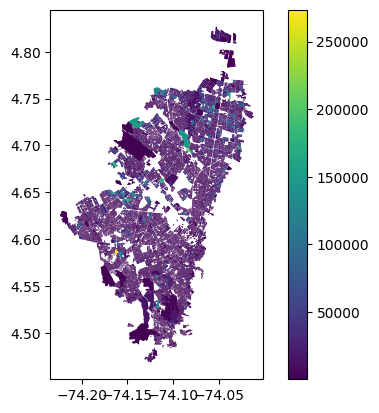

In [69]:
union_1.plot(column = 'area_resid', markersize = .5, legend = True)

(80000.0, 130000.0)

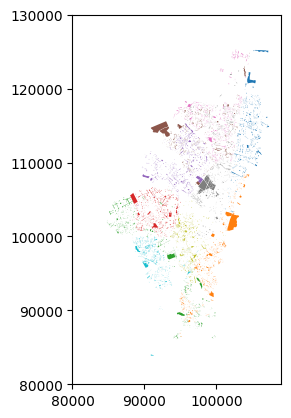

In [75]:
fx = union_1.plot(column = 'Id_Parque', markersize = .5)
y_min = 80000
y_max = 130000
x_min = 80000
fx.set_xlim(x_min)
fx.set_ylim(y_min, y_max)

(80000.0, 130000.0)

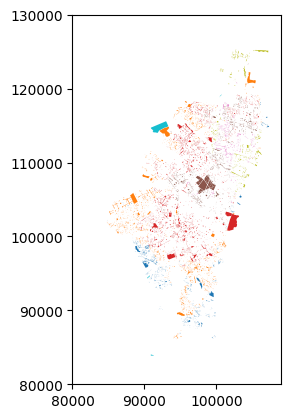

In [74]:
ax = union_1.plot(column = 'Estrato', markersize = .5)
y_min = 80000
y_max = 130000
x_min = 80000
ax.set_xlim(x_min)
ax.set_ylim(y_min, y_max)

In [91]:
#Unimos la base restante
base_bog = gpd.sjoin(union_1, ips, how = 'left', op = 'intersects')

#left:
#dejamos todas las filas de union_1 y agregamos las caracteristicas de
#ips si existe coincidencia espacial

#intersects:
#verifica si dos geometrias se interseptan en algun punto

/Users/macbookair/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [92]:
base_bog.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 80838 entries, 0 to 79513
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MANCODIGO          75523 non-null  object  
 1   area_resid         75523 non-null  float64 
 2   shape_area_resid   75523 non-null  float64 
 3   shape_len_resid    75523 non-null  float64 
 4   OBJECTID           5315 non-null   float64 
 5   Id_Parque          5315 non-null   object  
 6   Estrato            5315 non-null   object  
 7   Id_Upz             5314 non-null   object  
 8   Nombre_Par         5315 non-null   object  
 9   TipoParque         5315 non-null   object  
 10  LocNombre          5315 non-null   object  
 11  shape_len_parque   5315 non-null   float64 
 12  shape_area_parque  5315 non-null   float64 
 13  Id_Localid         5315 non-null   float64 
 14  geometry           80838 non-null  geometry
 15  index_right        3530 non-null   float64 
 16  I

In [93]:
renombrar_columnas = {
    'nombre': 'nombre_ips',
}
base_bog = base_bog.rename(columns = renombrar_columnas)

<Axes: >

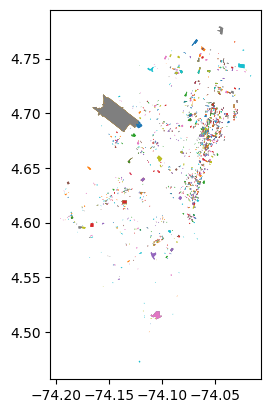

In [95]:
base_bog.plot(column = 'nombre_ips', markersize = .5)

In [96]:
#Guardamos la base resultante
base_bog.to_file('base_bogota.gpkg', driver = 'GPKG')